<a href="https://www.kaggle.com/code/officialaditshrm/fds-credit-card-fraud-detection-project?scriptVersionId=267065777" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


**Foundations of Data Science - Course Project**

**Professor: Antony Seba P**
# Credit Card Fraud Detection
### Group Members
* Aditya Sharma - 22BDS0009
* Harshvardhan Vatsa - 22BDS0318
* Ayushmaan Mishra - 22BDS0367

Notebook URL: [Kaggle-Notebook](https://www.kaggle.com/code/officialaditshrm/credit-card-fraud-detection-project)

Dataset Link: [Fraud-Detection](http://www.kaggle.com/datasets/kartik2112/fraud-detection)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option("display.max_columns", None)


warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [2]:
df = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Univariate Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
df.describe

<bound method NDFrame.describe of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutm

It looks like Column **Unnamed: 0** is nothing but the serial number

### Numerical Columns

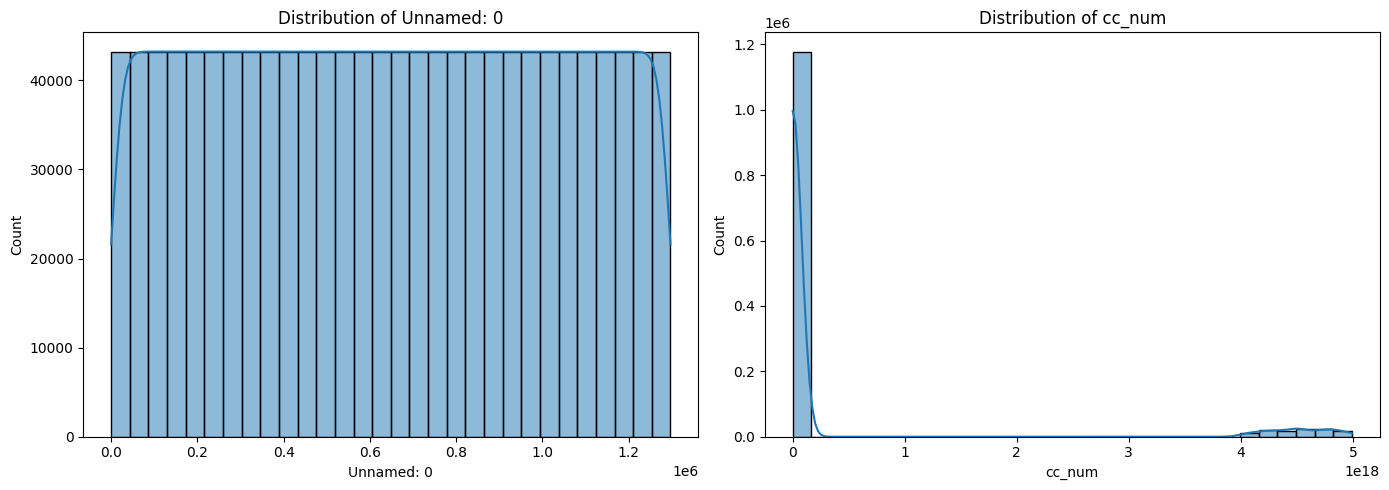

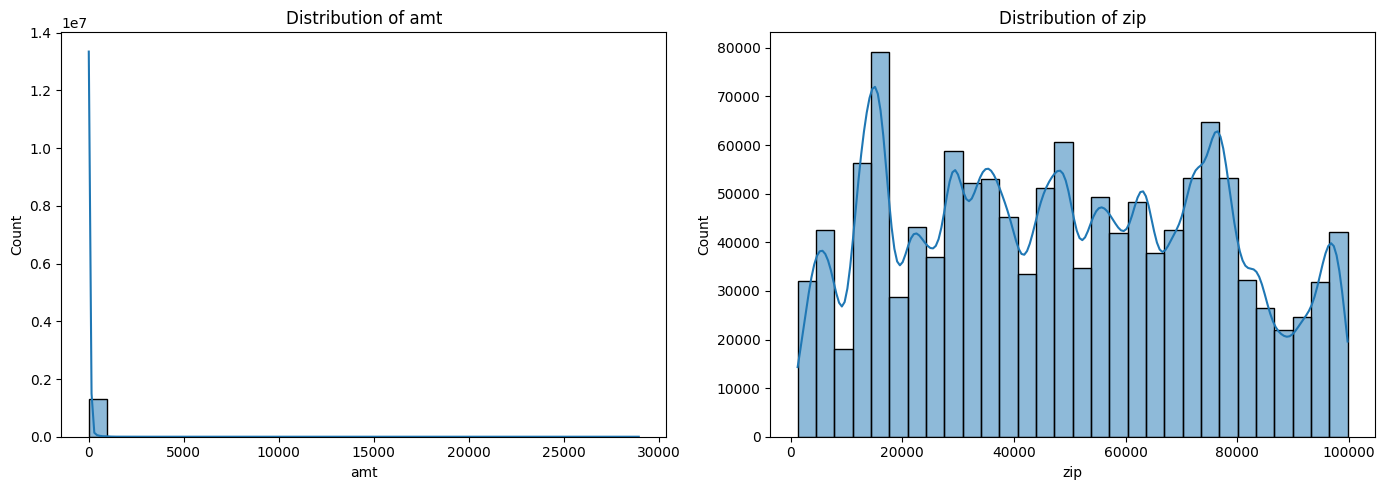

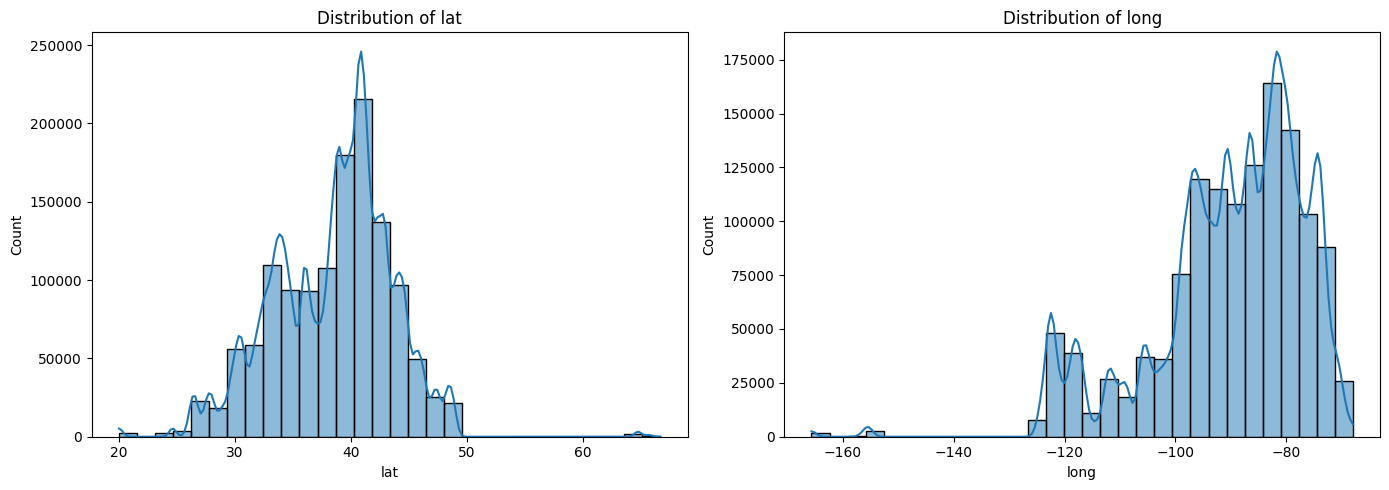

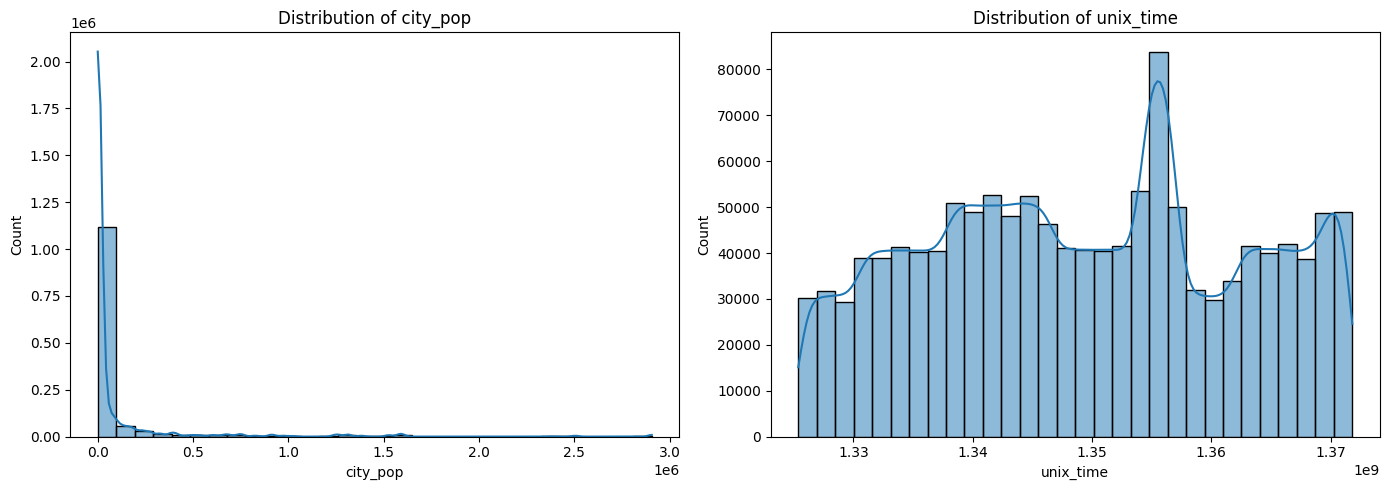

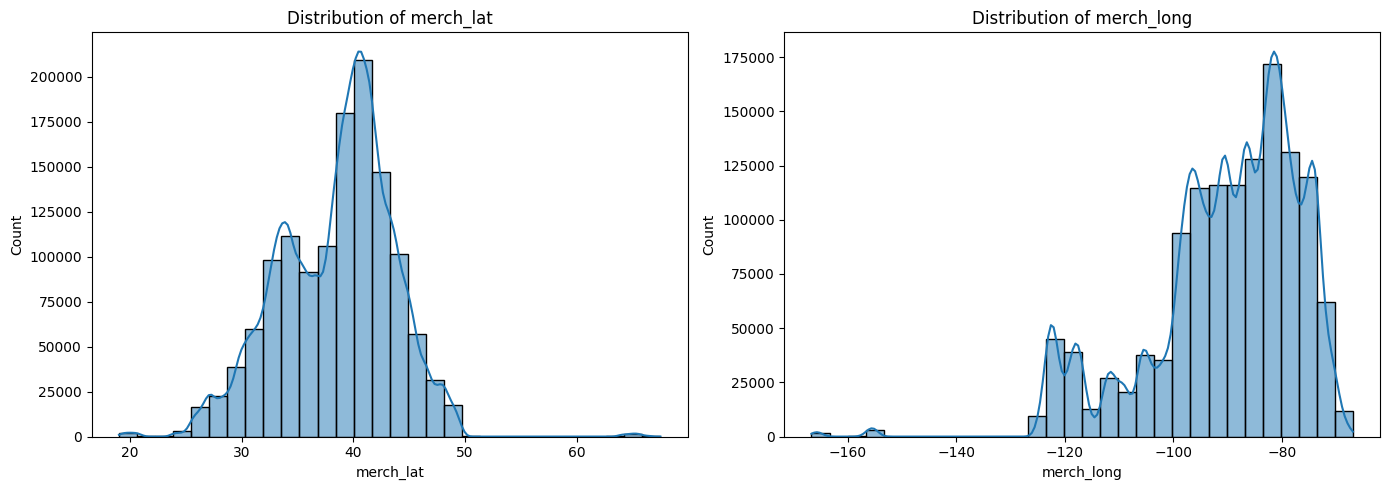

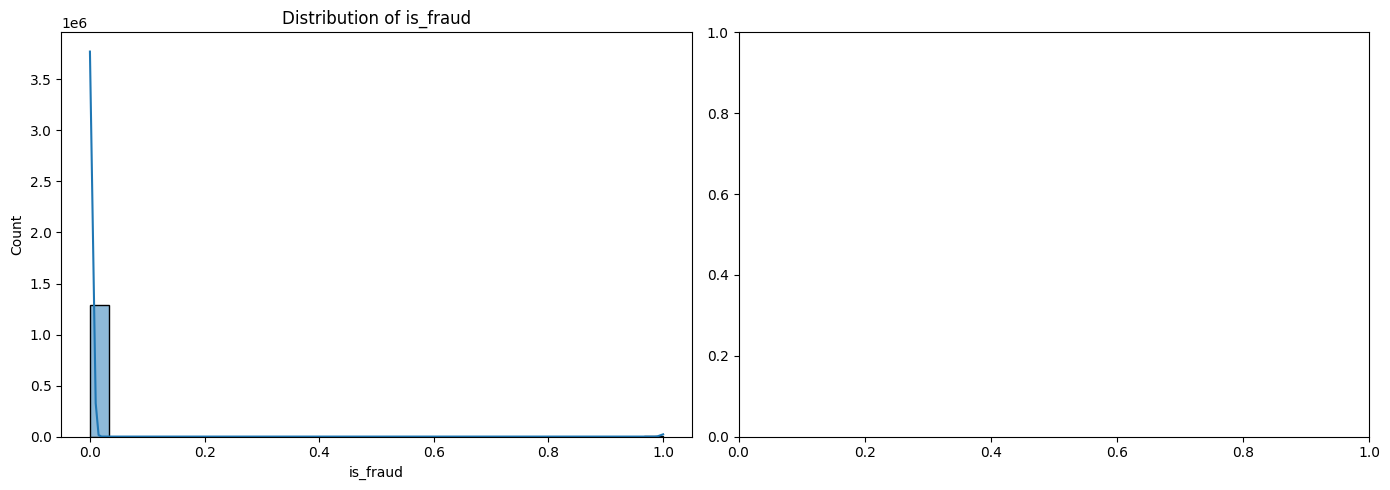

In [5]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Loop through numerical columns in steps of 2
for i in range(0, len(num_cols), 2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns
    
    for j in range(2):
        if i + j < len(num_cols):  # safeguard in case odd number of columns
            col = num_cols[i + j]
            
            # Histogram with KDE
            sns.histplot(df[col], kde=True, bins=30, ax=axes[j])
            axes[j].set_title(f"Distribution of {col}")
    
    plt.tight_layout()
    plt.show()


### Categorical Columns

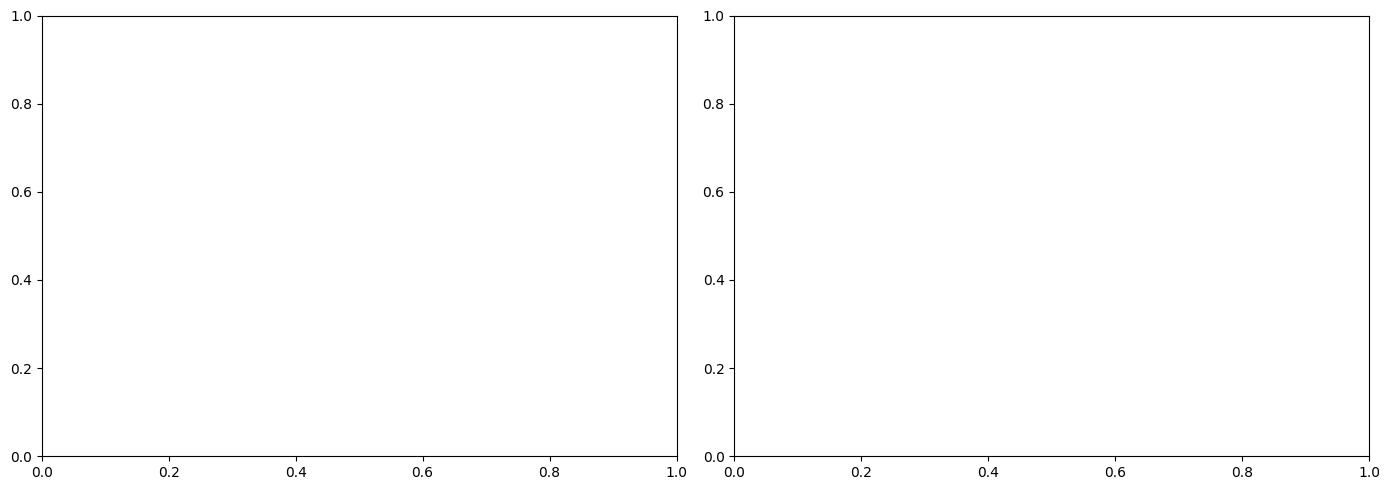

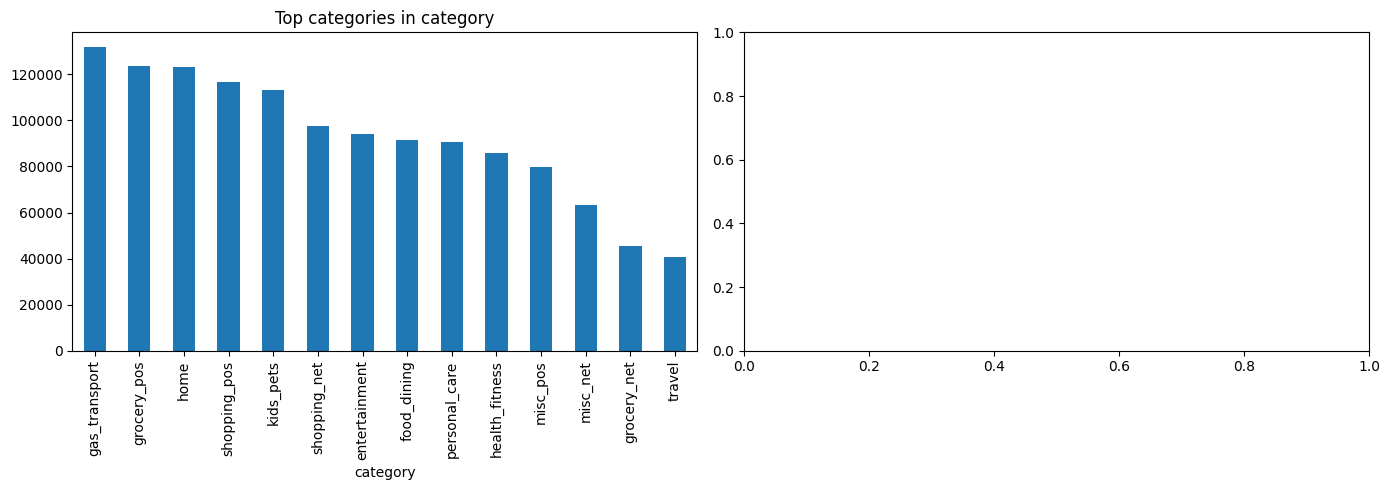

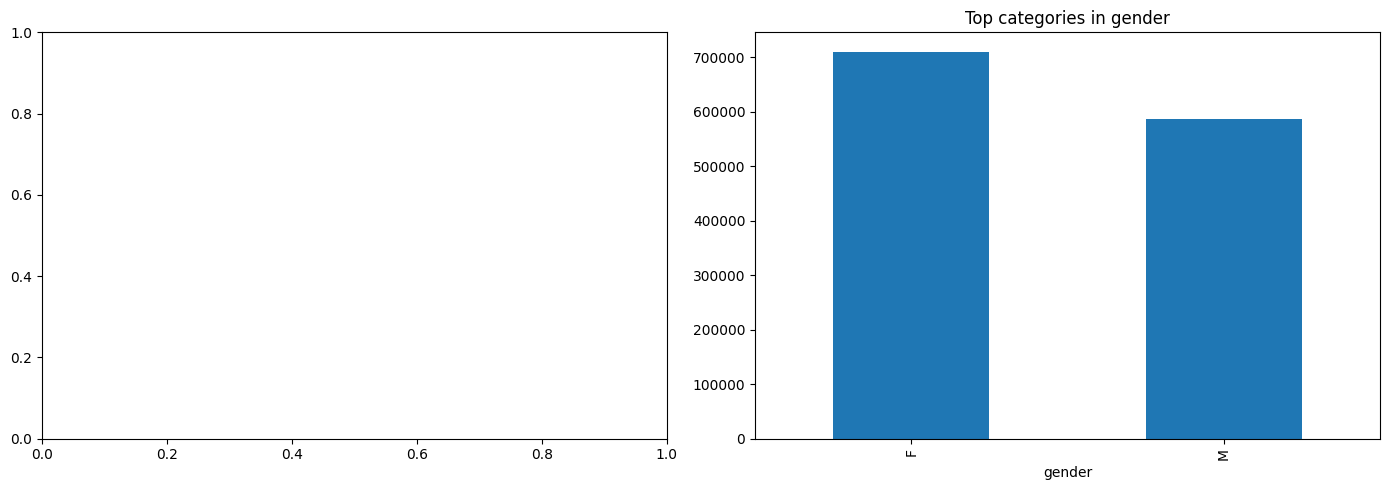

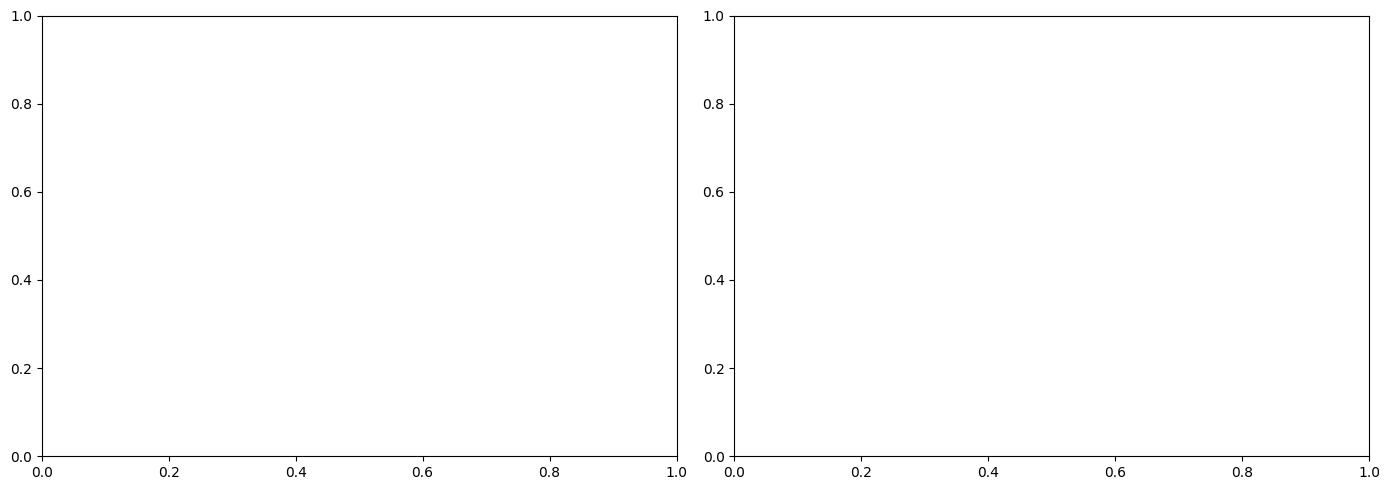

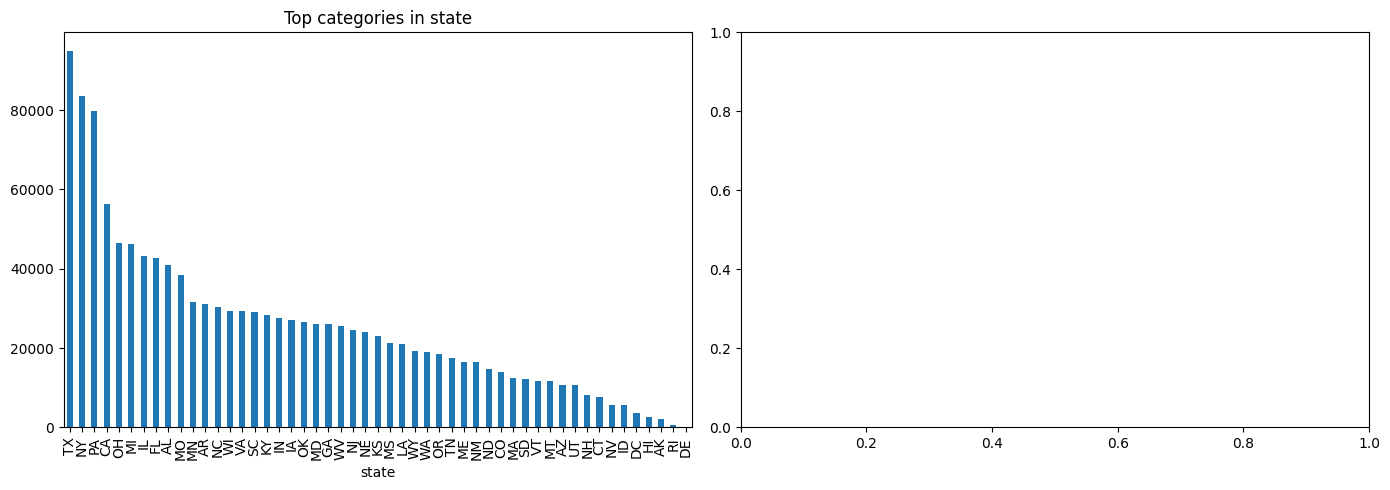

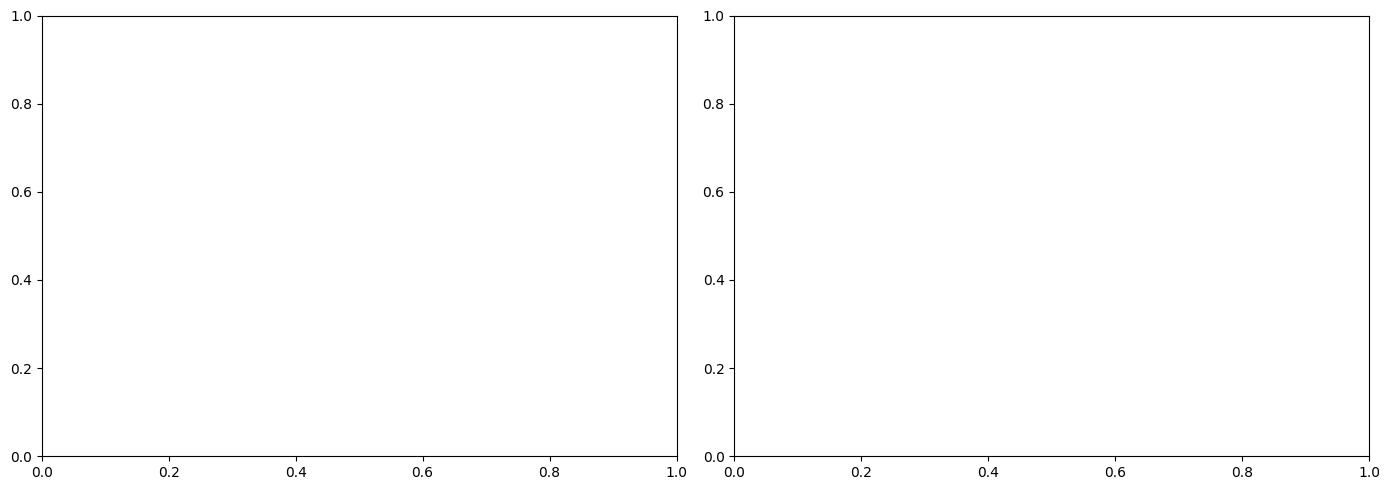

In [6]:
cat_cols = df.select_dtypes(include=['object']).columns

# Loop through categorical columns in steps of 2
for i in range(0, len(cat_cols), 2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns
    
    for j in range(2):
        if i + j < len(cat_cols):  # avoid index error if odd number of columns
            col = cat_cols[i + j]
            if df[col].nunique() <= 100:
                df[col].value_counts().plot(kind='bar', ax=axes[j])
                axes[j].set_title(f"Top categories in {col}")
    
    plt.tight_layout()
    plt.show()


### Fraud Column (Result Column)

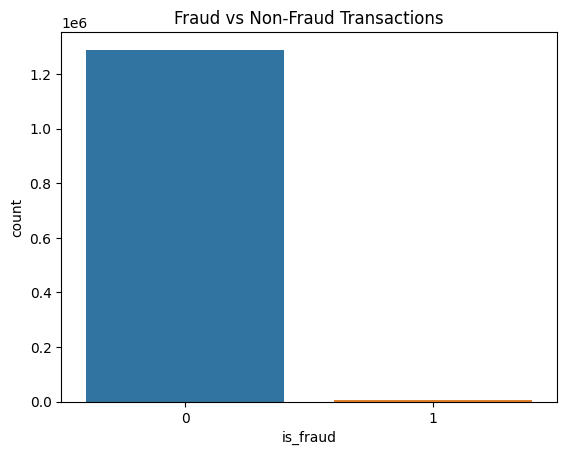

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64


In [7]:
sns.countplot(x="is_fraud", data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

print(df['is_fraud'].value_counts(normalize=True))

## We can clearly see that the data is highly imbalanced. We will solve this problem further in this notebook using SMOTE Analysis

### Outlier Detection Boxplots

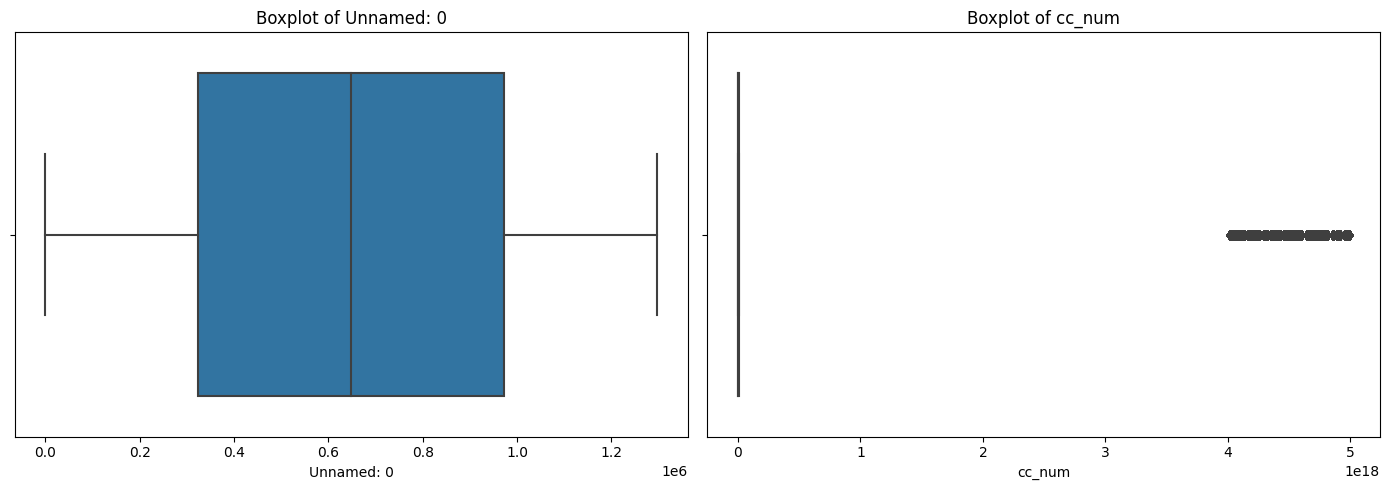

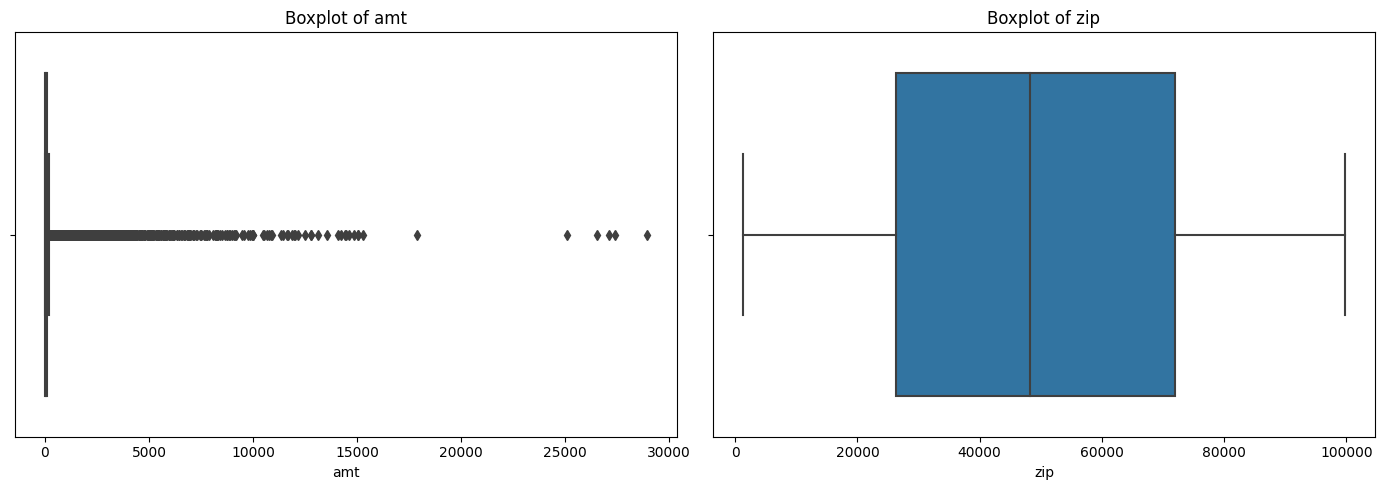

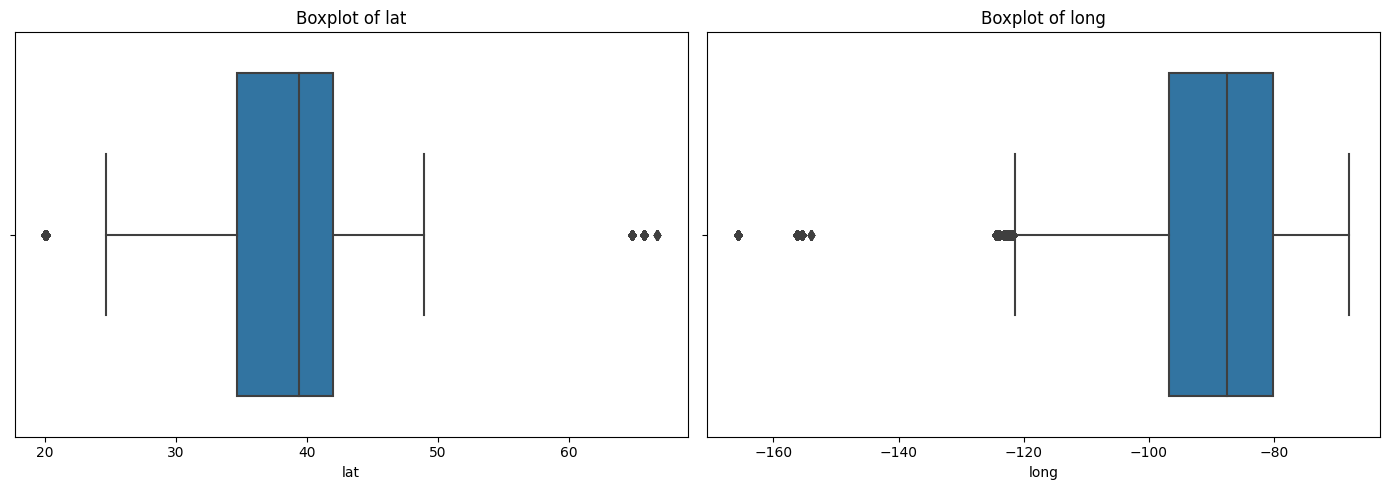

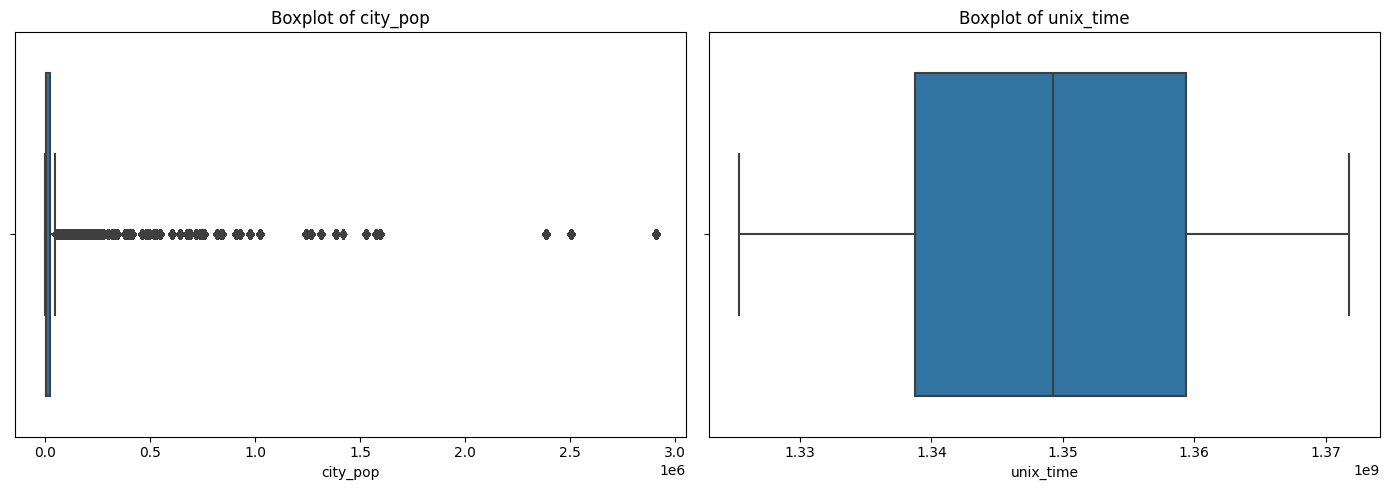

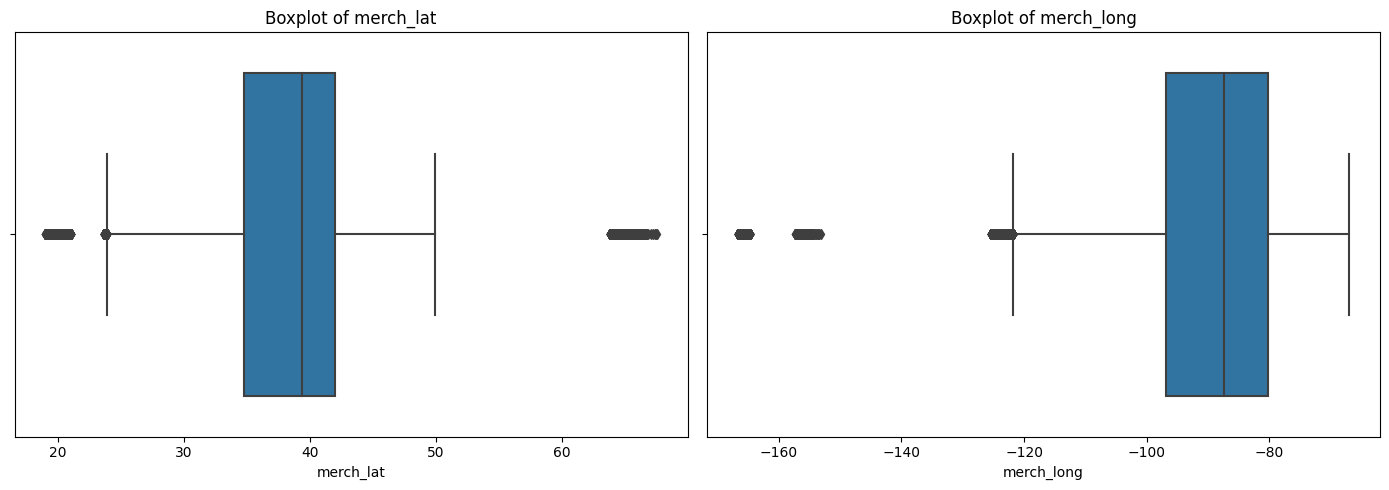

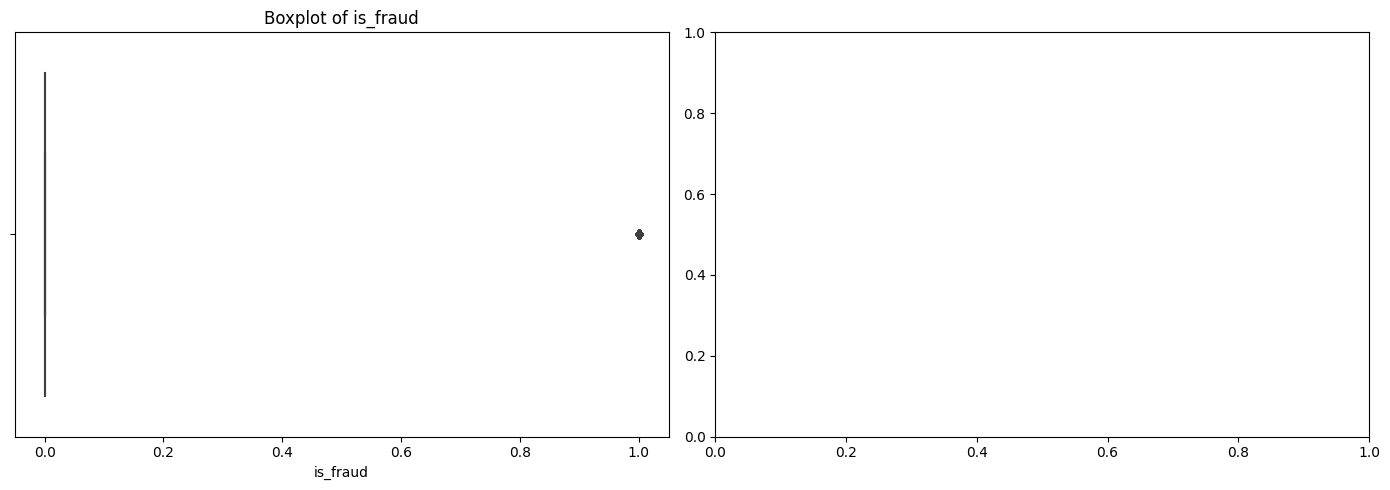

In [8]:
for i in range(0, len(num_cols), 2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns
    
    for j in range(2):
        if i + j < len(num_cols) and axes[j]:  # safeguard for odd count
            col = num_cols[i + j]
            sns.boxplot(x=df[col], ax=axes[j])
            axes[j].set_title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()


### New columns for proper date and time

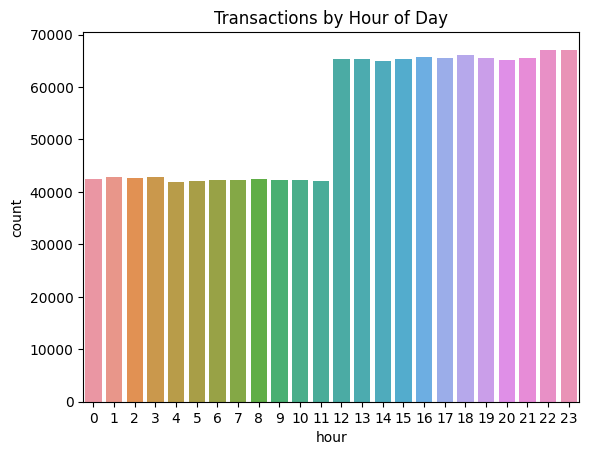

In [9]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['dayofweek'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month

sns.countplot(x="hour", data=df)
plt.title("Transactions by Hour of Day")
plt.show()


In [10]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,dayofweek,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,1


## Bivariate Analysis

### Correlation Heatmap

### Numerical vs Numerical (Scatter Plot)

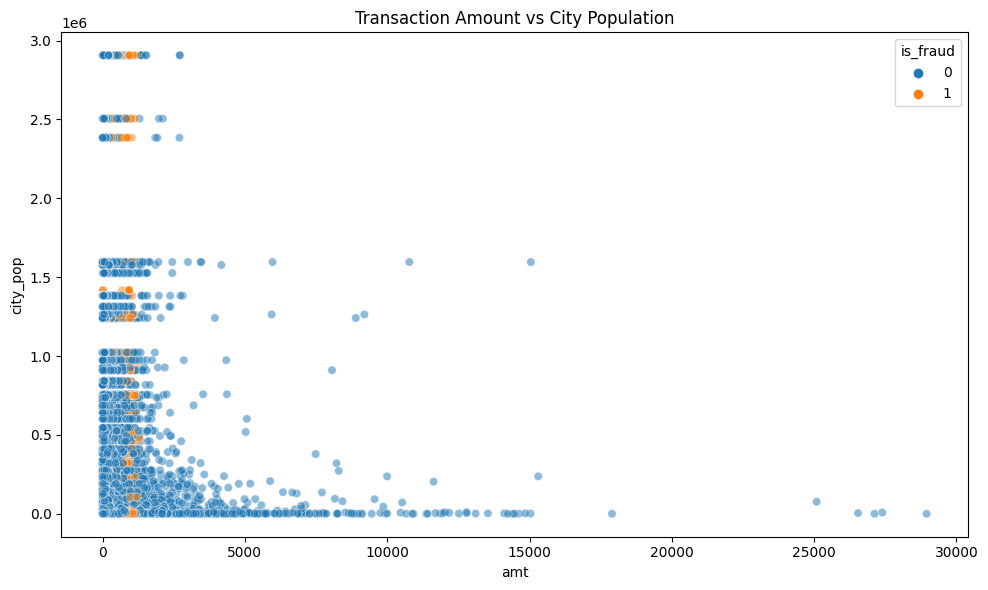

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="amt", y="city_pop", hue="is_fraud", data=df, alpha=0.5)
plt.title("Transaction Amount vs City Population")
plt.tight_layout()
plt.show()

### Numerical vs Categorical

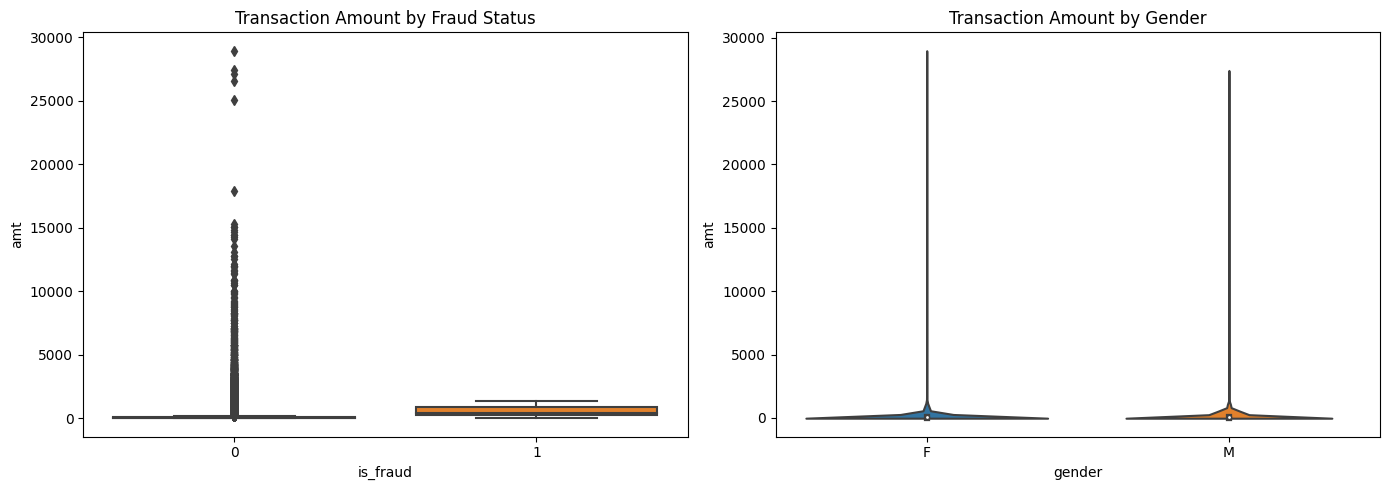

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.boxplot(x="is_fraud", y="amt", data=df, ax=axes[0])
axes[0].set_title("Transaction Amount by Fraud Status")

sns.violinplot(x="gender", y="amt", data=df, ax=axes[1])
axes[1].set_title("Transaction Amount by Gender")

plt.tight_layout()
plt.show()

### Categorical vs Categorical

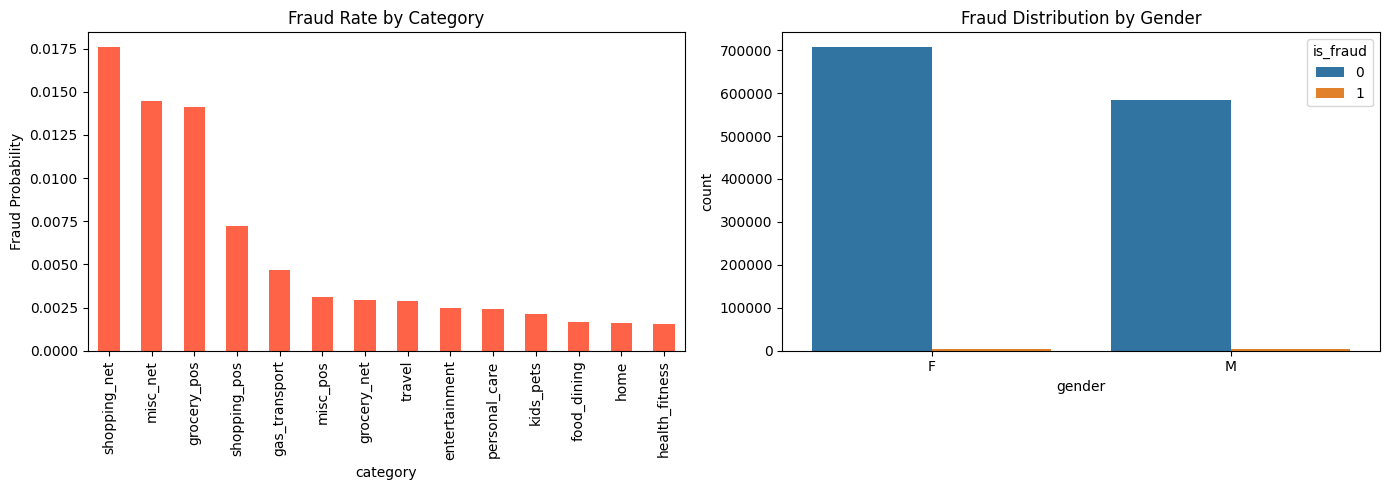

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

fraud_rate = df.groupby("category")["is_fraud"].mean().sort_values(ascending=False)
fraud_rate.plot(kind="bar", color="tomato", ax=axes[0])
axes[0].set_title("Fraud Rate by Category")
axes[0].set_ylabel("Fraud Probability")

sns.countplot(x="gender", hue="is_fraud", data=df, ax=axes[1])
axes[1].set_title("Fraud Distribution by Gender")

plt.tight_layout()
plt.show()

### Time Based Fraud Analysis

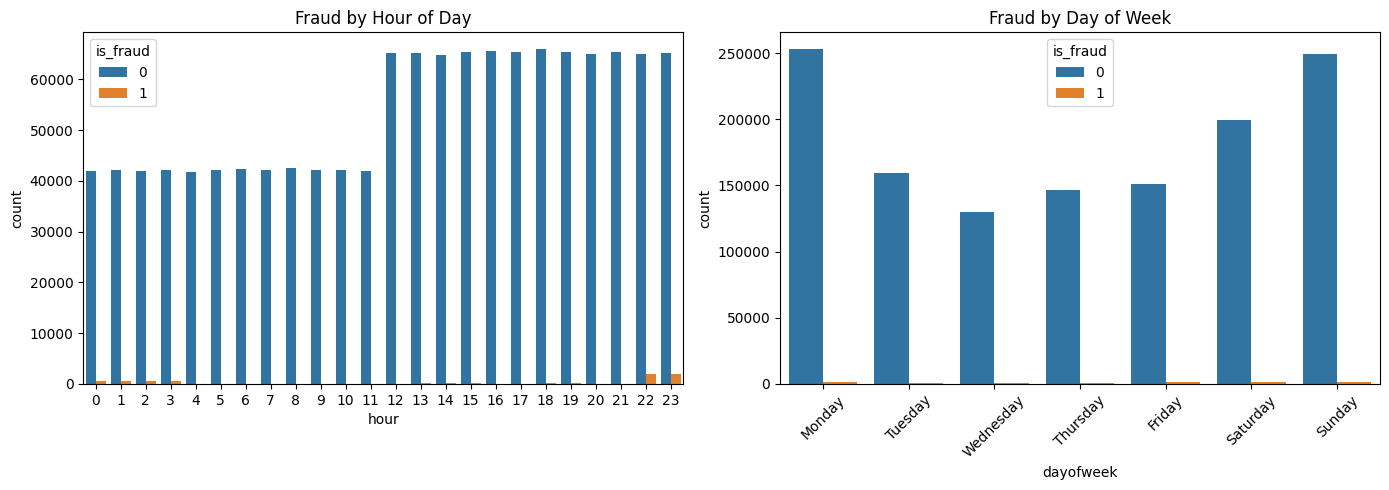

In [14]:
df["hour"] = df["trans_date_trans_time"].dt.hour
df["dayofweek"] = df["trans_date_trans_time"].dt.day_name()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.countplot(x="hour", hue="is_fraud", data=df, ax=axes[0])
axes[0].set_title("Fraud by Hour of Day")

sns.countplot(x="dayofweek", hue="is_fraud", 
              data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], ax=axes[1])
axes[1].set_title("Fraud by Day of Week")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

## Multivariate Analysis

### A quick overview of how numerical features interact, colored by fraud.

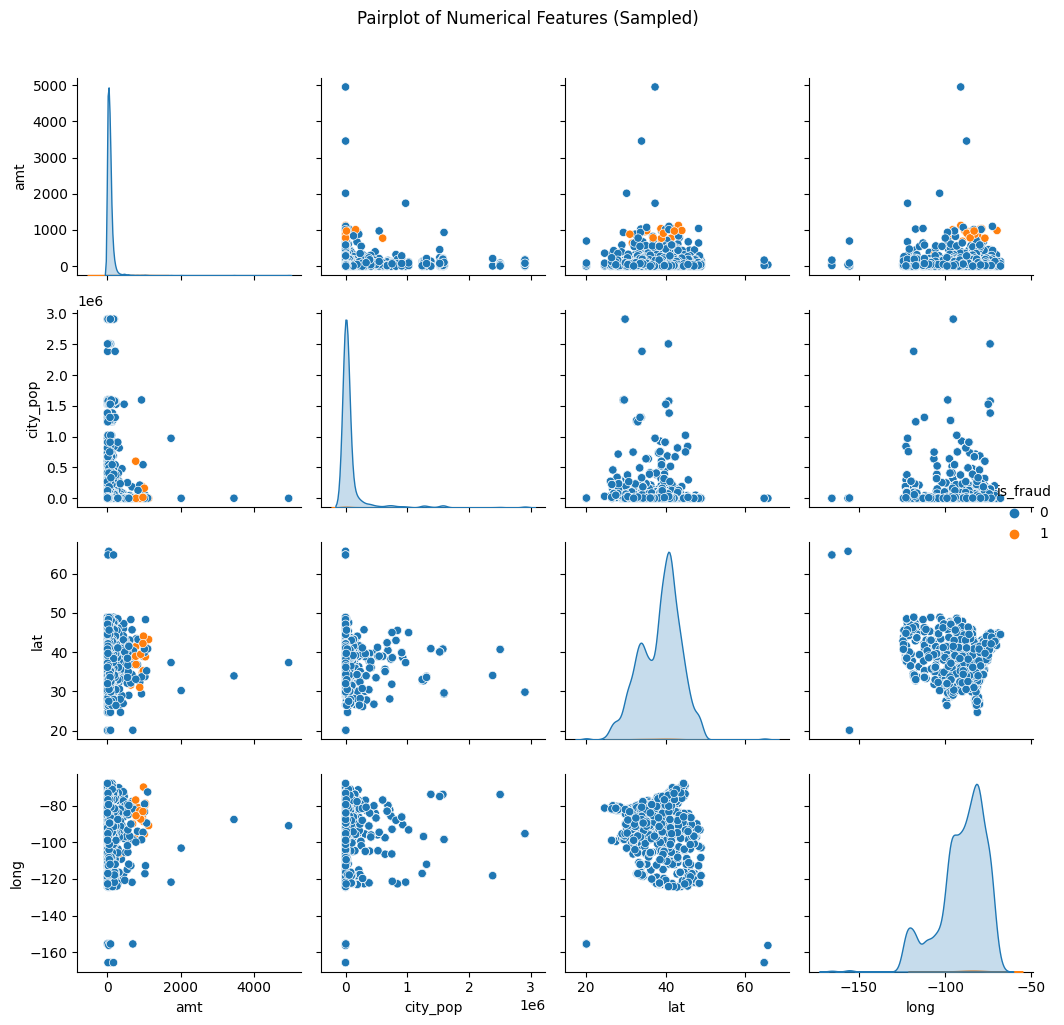

In [15]:
sns.pairplot(df.sample(5000), vars=["amt", "city_pop", "lat", "long"], hue="is_fraud", diag_kind="kde")
plt.suptitle("Pairplot of Numerical Features (Sampled)", y=1.02)
plt.tight_layout()
plt.show()

### Correlation with Target (Heatmap including is_fraud)

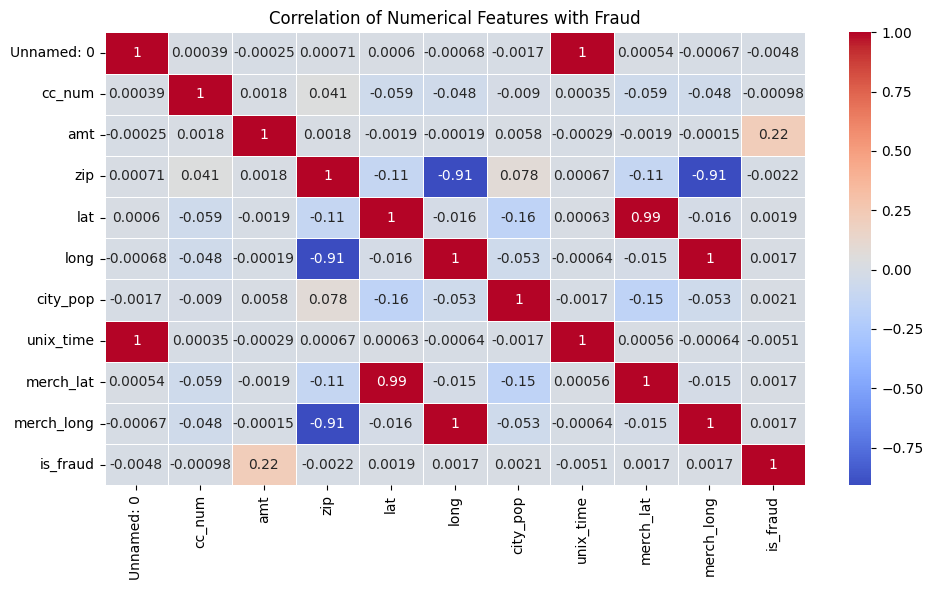

In [16]:
plt.figure(figsize=(10,6))
corr = df[num_cols].corr()   # no need to join is_fraud again
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of Numerical Features with Fraud")
plt.tight_layout()
plt.show()


### Fraud Rate by Category & Gender

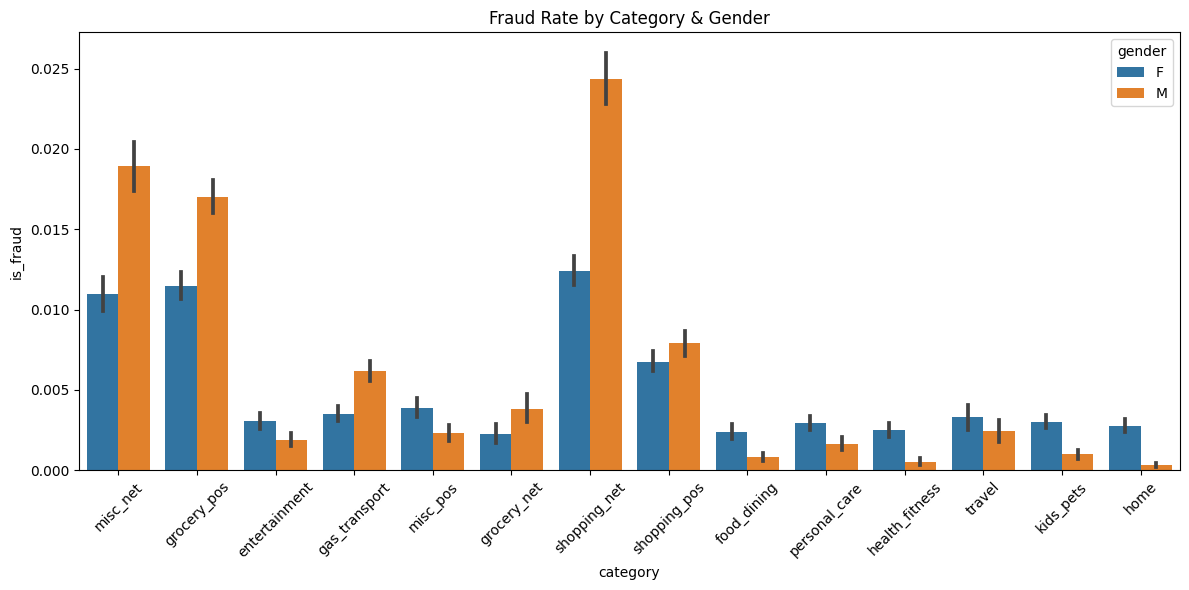

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x="category", y="is_fraud", hue="gender", data=df)
plt.title("Fraud Rate by Category & Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Fraud by Time + Category

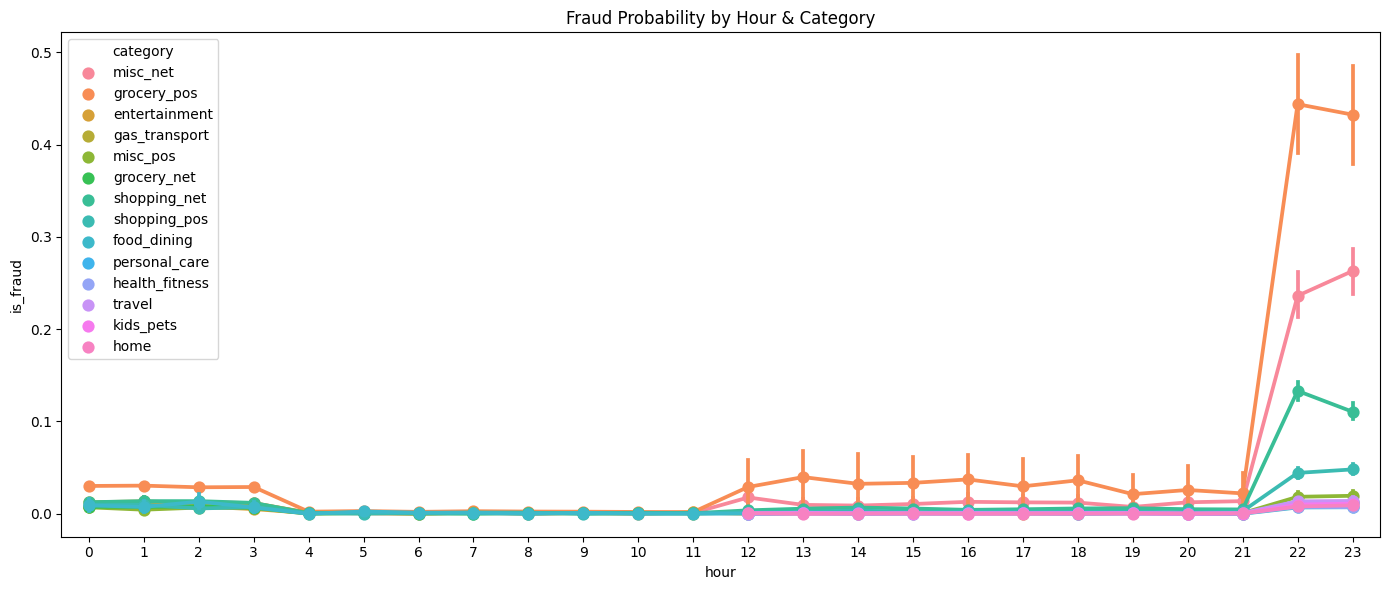

In [18]:
plt.figure(figsize=(14,6))
sns.pointplot(x="hour", y="is_fraud", hue="category", data=df)
plt.title("Fraud Probability by Hour & Category")
plt.tight_layout()
plt.show()

### 3D Scatterplot (Amount vs City Population vs Fraud)

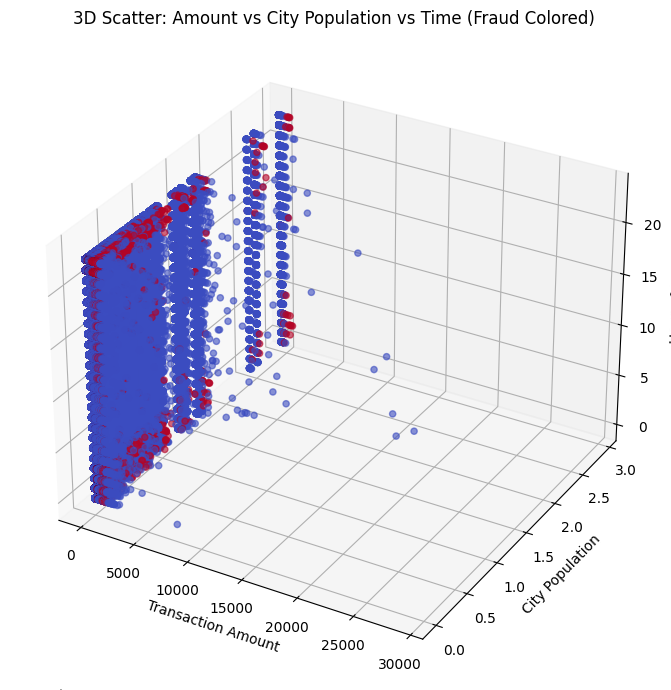

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["amt"], df["city_pop"], df["hour"], c=df["is_fraud"], cmap="coolwarm", alpha=0.6)
ax.set_xlabel("Transaction Amount")
ax.set_ylabel("City Population")
ax.set_zlabel("Hour of Day")
plt.title("3D Scatter: Amount vs City Population vs Time (Fraud Colored)")
plt.tight_layout()
plt.show()

### Parallel Coordinates Plot (Fraud vs Multiple Features)

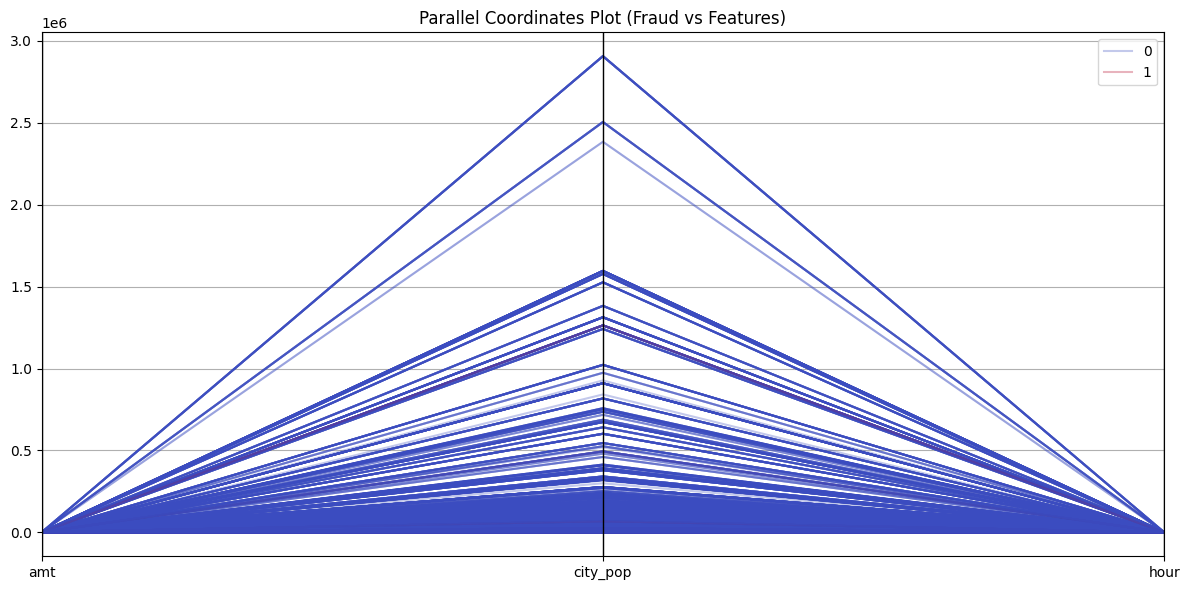

In [20]:
from pandas.plotting import parallel_coordinates

sample_df = df[["amt","city_pop","hour","is_fraud"]].sample(5000)
plt.figure(figsize=(12,6))
parallel_coordinates(sample_df, "is_fraud", colormap="coolwarm", alpha=0.3)
plt.title("Parallel Coordinates Plot (Fraud vs Features)")
plt.tight_layout()
plt.show()

# Dashboard Design

In [21]:
import ipywidgets as widgets
from ipywidgets import interact
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
num_cols = df.select_dtypes(include=["int64","float64"]).columns

category_dropdown = widgets.Dropdown(
    options=["All"] + sorted(df["category"].unique().tolist()),
    value="All",
    description="Category:"
)
gender_dropdown = widgets.Dropdown(
    options=["All", "M", "F"],
    value="All",
    description="Gender:"
)
fraud_toggle = widgets.Dropdown(
    options=["All", "Fraud", "Non-Fraud"],
    value="All",
    description="Fraud:"
)

def filter_data(category, gender, fraud_status):
    data = df.copy()
    if category != "All":
        data = data[data["category"] == category]
    if gender != "All":
        data = data[data["gender"] == gender]
    if fraud_status == "Fraud":
        data = data[data["is_fraud"] == 1]
    elif fraud_status == "Non-Fraud":
        data = data[data["is_fraud"] == 0]
    return data

def dashboard(category, gender, fraud_status):
    data = filter_data(category, gender, fraud_status)
    total_txns = len(data)
    fraud_txns = data["is_fraud"].sum()
    fraud_pct = (fraud_txns / total_txns * 100) if total_txns > 0 else 0
    avg_amt = data["amt"].mean() if total_txns > 0 else 0
    
    print(f"Total Transactions: {total_txns}")
    print(f"Fraud Transactions: {fraud_txns}")
    print(f"Fraud %: {fraud_pct:.2f}%")
    print(f"Avg Amount: ${avg_amt:.2f}")
    print("-"*60)
    
    fig, axes = plt.subplots(2, 2, figsize=(14,10))
    
    sns.histplot(data["amt"], bins=40, kde=True, ax=axes[0,0], color="skyblue")
    axes[0,0].set_title("Distribution of Transaction Amount")
    
    if len(data) > 0:
        fraud_rate = data.groupby("category")["is_fraud"].mean().sort_values(ascending=False)
        fraud_rate.plot(kind="bar", ax=axes[0,1], color="tomato")
        axes[0,1].set_title("Fraud Rate by Category")
    else:
        axes[0,1].text(0.5,0.5,"No Data", ha="center", va="center")
    
    if len(data) > 0:
        data["hour"] = data["trans_date_trans_time"].dt.hour
        sns.countplot(x="hour", hue="is_fraud", data=data, ax=axes[1,0])
        axes[1,0].set_title("Fraud by Hour of Day")
    else:
        axes[1,0].text(0.5,0.5,"No Data", ha="center", va="center")
    
    if len(data) > 0:
        sns.heatmap(data[num_cols].corr(), cmap="coolwarm", ax=axes[1,1])
        axes[1,1].set_title("Correlation Heatmap")
    else:
        axes[1,1].text(0.5,0.5,"No Data", ha="center", va="center")
    
    plt.tight_layout()
    plt.show()

interact(dashboard, 
         category=category_dropdown, 
         gender=gender_dropdown, 
         fraud_status=fraud_toggle)

interactive(children=(Dropdown(description='Category:', options=('All', 'entertainment', 'food_dining', 'gas_t…

<function __main__.dashboard(category, gender, fraud_status)>

# Data Cleaning

## Copy Dataset and handle Duplicates

In [22]:
import numpy as np
df_clean = df.copy()
df_clean = df_clean.drop_duplicates()
df_clean.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,dayofweek,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,1


## Drop columns with too many missing values (e.g. > 40%)

In [23]:
thresh = len(df_clean) * 0.4
df_clean = df_clean.dropna(thresh=thresh, axis=1)

# Fill numeric NaNs with median
num_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Fill categorical NaNs with mode
cat_cols = df_clean.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

In [24]:
df_clean.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,dayofweek,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,1
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,0,Tuesday,1
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,0,Tuesday,1
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,0,Tuesday,1
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,0,Tuesday,1
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,0,Tuesday,1


## Remove Outliers

In [25]:
if "amt" in df_clean.columns:
    q1 = df_clean["amt"].quantile(0.25)
    q3 = df_clean["amt"].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_clean = df_clean[(df_clean["amt"] >= lower) & (df_clean["amt"] <= upper)]

In [26]:
df_clean.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,dayofweek,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,1
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,0,Tuesday,1


## Encode categorical variables if needed

### Value counts of the categorical Variables

In [27]:
df_clean.nunique()

Unnamed: 0               1229385
trans_date_trans_time    1209705
cc_num                       971
merchant                     693
category                      14
amt                        19238
first                        350
last                         479
gender                         2
street                       971
city                         885
state                         51
zip                          958
lat                          956
long                         957
city_pop                     870
job                          491
dob                          956
trans_num                1229385
unix_time                1209734
merch_lat                1185280
merch_long               1210555
is_fraud                       2
hour                          24
dayofweek                      7
month                         12
dtype: int64

### We will Encode State, Gender, category, dayofweek

In [28]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Encode gender manually (binary)
df_encoded["gender"] = df_encoded["gender"].map({"M": 0, "F": 1})

# Encode state with LabelEncoder
le_state = LabelEncoder()
df_encoded["state"] = le_state.fit_transform(df_encoded["state"])

# Encode category with LabelEncoder
le_cat = LabelEncoder()
df_encoded["category"] = le_cat.fit_transform(df_encoded["category"])

# One-hot encode dayofweek
df_encoded = pd.get_dummies(df_encoded, columns=["dayofweek"], prefix="day")

# Check encodings
print("Gender:\n", df_encoded["gender"].value_counts())
print("\nState (encoded):\n", df_encoded["state"].value_counts().head())
print("\nCategory (encoded):\n", df_encoded["category"].value_counts().head())
print("\nDay of week one-hot:\n", df_encoded.filter(like="dayofweek_").head())

Gender:
 gender
1    709863
0    586812
Name: count, dtype: int64

State (encoded):
 state
43    94876
34    83501
38    79847
4     56360
35    46480
Name: count, dtype: int64

Category (encoded):
 category
2     131659
4     123638
6     123115
12    116672
7     113035
Name: count, dtype: int64

Day of week one-hot:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [29]:
df_encoded.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",8,4.97,Jennifer,Banks,1,561 Perry Cove,Moravian Falls,27,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,False,False,False,False,False,True,False
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",4,107.23,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,47,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,False,False,False,False,False,True,False
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,0,220.11,Edward,Sanchez,0,594 White Dale Suite 530,Malad City,13,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,False,False,False,False,False,True,False
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",2,45.00,Jeremy,White,0,9443 Cynthia Court Apt. 038,Boulder,26,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,False,False,False,False,False,True,False
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,9,41.96,Tyler,Garcia,0,408 Bradley Rest,Doe Hill,45,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,False,False,False,False,False,True,False
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",2,94.63,Jennifer,Conner,1,4655 David Island,Dublin,38,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,0,1,False,False,False,False,False,True,False
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,3,44.54,Kelsey,Richards,1,889 Sarah Station Suite 624,Holcomb,16,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,0,1,False,False,False,False,False,True,False
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,2,71.65,Steven,Williams,0,231 Flores Pass Suite 720,Edinburg,45,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,0,1,False,False,False,False,False,True,False
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,9,4.27,Heather,Chase,1,6888 Hicks Stream Suite 954,Manor,38,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,0,1,False,False,False,False,False,True,False
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",4,198.39,Melissa,Aguilar,1,21326 Taylor Squares Suite 708,Clarksville,42,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,0,1,False,False,False,False,False,True,False


In [30]:
df.tail(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,dayofweek,month
1296665,1296665,2020-06-21 12:08:42,213193596103206,fraud_Gulgowski LLC,home,72.17,James,Hunt,M,7369 Gabriel Tunnel,Pointe Aux Pins,MI,49775,45.7549,-84.4470,95,Electrical engineer,1994-02-09,108c103b26f686c24c021aaf4210977e,1371816522,44.938461,-83.996234,0,12,Sunday,6
1296666,1296666,2020-06-21 12:09:22,4587657402165341815,"fraud_Hyatt, Russel and Gleichner",health_fitness,7.30,Amber,Lewis,F,6296 John Keys Suite 858,Pembroke Township,IL,60958,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,37a18c6fb0c5c722b6339ffedc82f55a,1371816562,40.556811,-88.092339,0,12,Sunday,6
1296667,1296667,2020-06-21 12:10:56,4822367783500458,"fraud_Hahn, Douglas and Schowalter",travel,19.71,Christopher,Farrell,M,97070 Anderson Land,Haines City,FL,33844,28.0758,-81.5929,33804,Exercise physiologist,1991-01-01,34e72e0a659a6c8f4a20ee65594f3a7d,1371816656,27.465871,-81.511804,0,12,Sunday,6
1296668,1296668,2020-06-21 12:11:23,213141712584544,"fraud_Metz, Russel and Metz",kids_pets,100.85,Margaret,Curtis,F,742 Oneill Shore,Florence,MS,39073,32.1530,-90.1217,19685,Fine artist,1984-12-24,0d86d8c17638d7eff77db9c6a878b477,1371816683,31.377697,-90.528450,0,12,Sunday,6
1296669,1296669,2020-06-21 12:11:36,4400011257587661852,fraud_Stiedemann Inc,misc_pos,37.38,Marissa,Powell,F,474 Allen Haven,North Loup,NE,68859,41.4972,-98.7858,509,"Nurse, children's",1980-09-15,9a7ea2625cf8303efe34e3c09546868f,1371816696,41.728638,-99.039660,0,12,Sunday,6
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,12,Sunday,6
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,12,Sunday,6
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,12,Sunday,6
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,12,Sunday,6
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,MT,59871,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0,12,Sunday,6
